# Loan Default Prediction: Credit Risk Analysis
**Author:** [Rahul Maheshwari]  
**Project Objective:** Build a machine learning model to predict the probability of loan default. 
The goal is to provide a reliable tool for risk assessment using only information available at 
the time of the loan application.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
df.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending = False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [10]:
pd.reset_option('display.max_rows')

## Data Cleaning & Leakage Prevention
A critical step in financial modeling is identifying **Data Leakage**. I am removing features 
that are updated *after* the loan is granted (e.g., `recoveries`, `total_rec_prncp`, `last_pymnt_amnt`). 
Using these would lead to an unrealistic model. I am also dropping metadata like `id` and `url` 
that hold no predictive power.

In [11]:
threshold = 0.7 
df = df.loc[:, df.isnull().mean() < threshold]

In [12]:
df.shape
df.isnull().mean().sort_values(ascending=False)

mths_since_last_delinq        0.646625
desc                          0.325855
emp_title                     0.061913
emp_length                    0.027066
pub_rec_bankruptcies          0.017549
last_pymnt_d                  0.001788
chargeoff_within_12_mths      0.001410
collections_12_mths_ex_med    0.001410
revol_util                    0.001259
tax_liens                     0.000982
title                         0.000277
last_credit_pull_d            0.000050
out_prncp                     0.000000
initial_list_status           0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_acc                     0.000000
total_pymnt_inv               0.000000
recoveries                    0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
pub_rec                       0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
policy_code              

In [13]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100
df['term_months'] = df['term'].str.replace(' months', '').astype(int)

In [14]:
df = df.drop(columns=['mths_since_last_delinq', 'desc', 'id', 'member_id',])

In [15]:
leakage_columns = [
    'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'url', 
    'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'last_pymnt_d', 
    'last_credit_pull_d', 'term', 'issue_d', 'pymnt_plan',
    'addr_state', 'zip_code', 'addr_state', 'emp_title', 'title',
    'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
    'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 
    'delinq_amnt', 'tax_liens'
]
df = df.drop(columns=leakage_columns)

In [16]:
df.isnull().mean().sort_values(ascending=False)

emp_length              0.027066
pub_rec_bankruptcies    0.017549
revol_util              0.001259
loan_amnt               0.000000
earliest_cr_line        0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
inq_last_6mths          0.000000
delinq_2yrs             0.000000
int_rate                0.000000
dti                     0.000000
purpose                 0.000000
loan_status             0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
term_months             0.000000
dtype: float64

In [17]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [18]:
df

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,term_months
0,5000,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,...,1,3,0,13648,0.837,9,f,INDIVIDUAL,0.0,36
1,2500,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,5,3,0,1687,0.094,4,f,INDIVIDUAL,0.0,60
2,2400,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,2,2,0,2956,0.985,10,f,INDIVIDUAL,0.0,36
3,10000,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,1,10,0,5598,0.210,37,f,INDIVIDUAL,0.0,36
4,3000,0.1269,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,...,0,15,0,27783,0.539,38,f,INDIVIDUAL,0.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,0.0807,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,...,0,13,0,7274,0.131,40,f,INDIVIDUAL,NaN,36
39713,8500,0.1028,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,...,1,6,0,8847,0.269,9,f,INDIVIDUAL,NaN,36
39714,5000,0.0807,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,...,0,11,0,9698,0.194,20,f,INDIVIDUAL,NaN,36
39715,5000,0.0743,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,...,0,17,0,85607,0.007,26,f,INDIVIDUAL,NaN,36


In [19]:
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

In [20]:
df

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,term_months
0,5000,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,...,1,3,0,13648,0.837,9,f,INDIVIDUAL,0.0,36
1,2500,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,5,3,0,1687,0.094,4,f,INDIVIDUAL,0.0,60
2,2400,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,2,2,0,2956,0.985,10,f,INDIVIDUAL,0.0,36
3,10000,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,1,10,0,5598,0.210,37,f,INDIVIDUAL,0.0,36
5,5000,0.0790,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,...,3,9,0,7963,0.283,12,f,INDIVIDUAL,0.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,0.0807,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,...,0,13,0,7274,0.131,40,f,INDIVIDUAL,NaN,36
39713,8500,0.1028,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,...,1,6,0,8847,0.269,9,f,INDIVIDUAL,NaN,36
39714,5000,0.0807,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,...,0,11,0,9698,0.194,20,f,INDIVIDUAL,NaN,36
39715,5000,0.0743,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,...,0,17,0,85607,0.007,26,f,INDIVIDUAL,NaN,36


## Feature Engineering
To capture the financial health of the borrower better, I created:
* **Installment-to-Income Ratio:** To see how much of their monthly salary goes to this loan.
* **Utilization per Account:** To measure credit dependency relative to total accounts.

In [21]:
df['util_per_acc'] = df['revol_bal'] / (df['total_acc'] + 1)
df['installment_to_inc_ratio'] = (df['installment'] / (df['annual_inc'] / 12))

In [22]:
df['target'] = df['loan_status'].map({
    'Fully Paid' : 0,
    'Charged Off' : 1
})

In [23]:
df['target'].value_counts()

target
0    32950
1     5627
Name: count, dtype: int64

In [24]:
df = df.drop('loan_status', axis=1)

In [25]:
X = df.iloc[:,:-1]
y = df['target']

In [26]:
X

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,term_months,util_per_acc,installment_to_inc_ratio
0,5000,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,...,0,13648,0.837,9,f,INDIVIDUAL,0.0,36,1364.800000,0.081435
1,2500,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,...,0,1687,0.094,4,f,INDIVIDUAL,0.0,60,337.400000,0.023932
2,2400,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,...,0,2956,0.985,10,f,INDIVIDUAL,0.0,36,268.727273,0.082595
3,10000,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,...,0,5598,0.210,37,f,INDIVIDUAL,0.0,36,147.315789,0.082759
5,5000,0.0790,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,...,0,7963,0.283,12,f,INDIVIDUAL,0.0,36,612.538462,0.052153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,0.0807,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,home_improvement,...,0,7274,0.131,40,f,INDIVIDUAL,NaN,36,177.414634,0.008555
39713,8500,0.1028,275.38,C,C1,3 years,RENT,18000.0,Not Verified,credit_card,...,0,8847,0.269,9,f,INDIVIDUAL,NaN,36,884.700000,0.183587
39714,5000,0.0807,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,debt_consolidation,...,0,9698,0.194,20,f,INDIVIDUAL,NaN,36,461.809524,0.018821
39715,5000,0.0743,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,other,...,0,85607,0.007,26,f,INDIVIDUAL,NaN,36,3170.629630,0.009323


In [27]:
y

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: target, Length: 38577, dtype: int64

In [28]:
num_cols = X.select_dtypes(exclude='object').columns
cat_col = X.select_dtypes(include='object').columns 

In [29]:
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'term_months',
       'util_per_acc', 'installment_to_inc_ratio'],
      dtype='object')

In [30]:
cat_col

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type'],
      dtype='object')

In [31]:
cat_col = cat_col.drop('earliest_cr_line')

In [32]:
len(num_cols), len(cat_col)

(16, 8)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pipeline Architecture
I implemented a `ColumnTransformer` within a `Pipeline` to automate:
1. **Numerical Data:** Median imputation and Standard Scaling.
2. **Categorical Data:** One-Hot Encoding for features like `grade` and `home_ownership`.
This ensures the preprocessing is consistent and prevents data leakage during cross-validation.

In [34]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [35]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [36]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_col)
])

In [37]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

In [38]:
model

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
y_pred = model.predict(X_test)

In [41]:
con_mat = confusion_matrix(y_test, y_pred)
classied_report = classification_report(y_test, y_pred)

In [42]:
con_mat

array([[4299, 2322],
       [ 387,  708]])

In [43]:
print(classied_report)

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      6621
           1       0.23      0.65      0.34      1095

    accuracy                           0.65      7716
   macro avg       0.58      0.65      0.55      7716
weighted avg       0.82      0.65      0.70      7716



In [44]:
y_proba = model.predict_proba(X_test)[:,1]
roc_auc_sc = roc_auc_score(y_test, y_proba)

In [45]:
roc_auc_sc

0.7027367605081107

## Model Optimization (Grid Search)
Using `GridSearchCV`, I am tuning the Logistic Regression model for:
* **Regularization Strength (C)**: To prevent overfitting.
* **Penalty (L1 vs L2)**: L1 (Lasso) will help in automated feature selection.
* **Class Weight**: Set to `balanced` to handle the low percentage of default cases in the data.

In [46]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10], 
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
}

In [47]:
grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

In [48]:
grid_model

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__penalty': ['l1', 'l2'], 'model__solver': ['liblinear']}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [49]:
grid_model.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__penalty': ['l1', 'l2'], 'model__solver': ['liblinear']}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [50]:
print('Best Parameters:', grid_model.best_params_)
print('Best Score:', grid_model.best_score_)

Best Parameters: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Score: 0.7067972278258434


## Business Logic: Threshold Tuning
In lending, the cost of a **False Negative** (missing a defaulter) is much higher than a 
**False Positive** (denying a good borrower). I am testing different probability thresholds 
to find the "sweet spot" that prioritizes **Recall** for the bank's safety.

In [51]:
best_model = grid_model.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]

for i in [0.3, 0.4, 0.5]:
    preds = (y_proba >= i).astype(int)
    print(f"\nThreshold = {i}")
    print(classification_report(y_test, preds))


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.96      0.25      0.40      6621
           1       0.17      0.93      0.29      1095

    accuracy                           0.35      7716
   macro avg       0.56      0.59      0.34      7716
weighted avg       0.85      0.35      0.38      7716


Threshold = 0.4
              precision    recall  f1-score   support

           0       0.94      0.45      0.61      6621
           1       0.20      0.82      0.32      1095

    accuracy                           0.50      7716
   macro avg       0.57      0.64      0.46      7716
weighted avg       0.83      0.50      0.57      7716


Threshold = 0.5
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      6621
           1       0.23      0.64      0.34      1095

    accuracy                           0.65      7716
   macro avg       0.58      0.65      0.55      7716
weighted avg       0.82

In [52]:
final_threshold = 0.4
final_preds = (y_proba >= final_threshold).astype(int)

In [53]:
print("Final Threshold:", final_threshold)
print(classification_report(y_test, final_preds))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_preds))

Final Threshold: 0.4
              precision    recall  f1-score   support

           0       0.94      0.45      0.61      6621
           1       0.20      0.82      0.32      1095

    accuracy                           0.50      7716
   macro avg       0.57      0.64      0.46      7716
weighted avg       0.83      0.50      0.57      7716

ROC-AUC: 0.7022995188272544
Confusion Matrix:
 [[2960 3661]
 [ 192  903]]


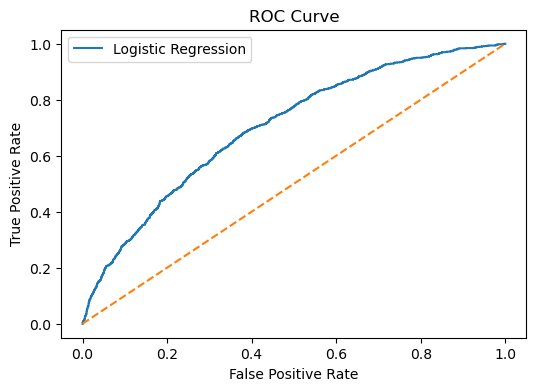

In [54]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

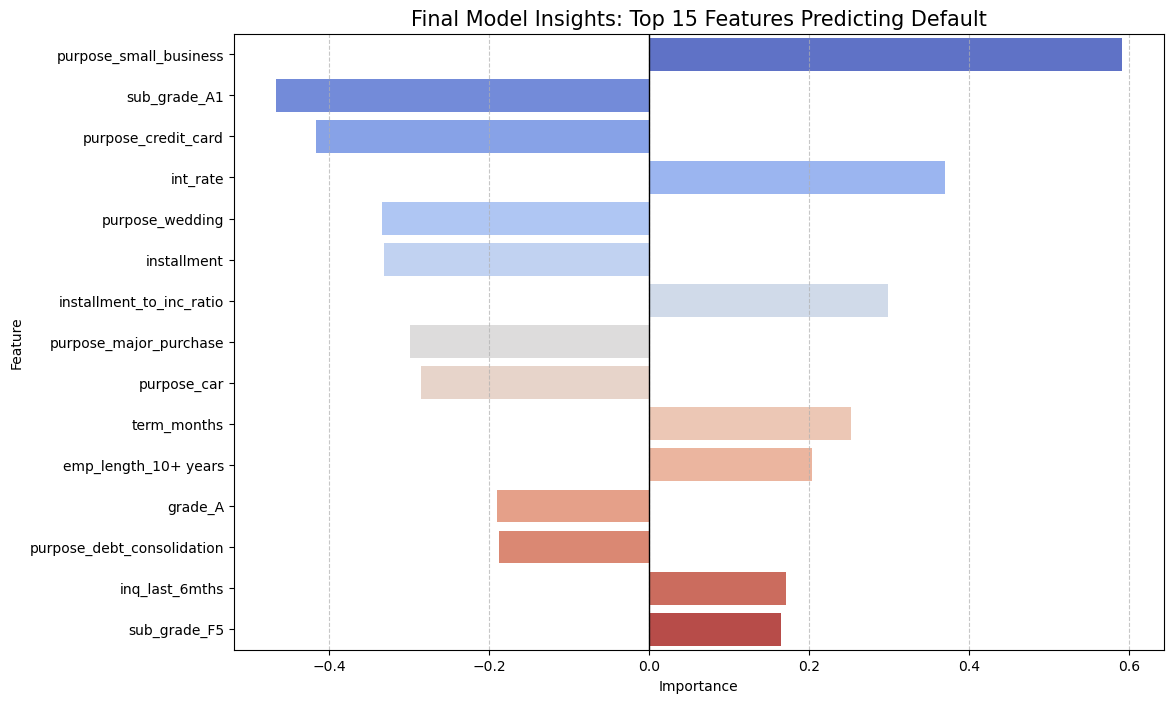

In [55]:
# 1. Get the feature names after OneHotEncoding
cat_features = best_model.named_steps['preprocessor'].transformers_[1][1]\
               .named_steps['encoder'].get_feature_names_out(cat_col)

# Combine numerical names with the new categorical names
all_features = np.append(num_cols, cat_features)

# 2. Getting the coefficients (Importance)
coeffs = best_model.named_steps['model'].coef_[0]

# 3. Create a DataFrame for easy plotting
feat_importance = pd.DataFrame({'Feature': all_features, 'Importance': coeffs})
feat_importance['Abs_Importance'] = feat_importance['Importance'].abs()
feat_importance = feat_importance.sort_values(by='Abs_Importance', ascending=False)

# 4. Plot the Top 15 Features
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature', palette='coolwarm')
plt.title('Final Model Insights: Top 15 Features Predicting Default', fontsize=15)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1) # Adds a center line
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Final Insights & Model Interpretability
This plot shows the top 15 features that drive the model's decisions. 
* **Positive Coefficients:** Increase the probability of default (Risk factors).
* **Negative Coefficients:** Decrease the probability of default (Safety factors).